## Task 1: Data pre-processing and Data exploration

In [1]:
#Loading the train dataset
import pandas as pd
train_data=pd.read_csv('trainingSet.csv')
train_data.sample(10)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
322,0,5,0,0,3,1,3,3,8,16,5,13,5,-1
104,3,9,0,1,5,4,1,29,34,55,15,18,35,1
333,2,1,0,0,1,1,1,4,5,12,4,8,8,1
285,2,7,0,0,4,1,1,22,27,33,13,12,29,1
346,0,1,3,0,1,1,1,6,16,19,9,5,11,-1
314,0,3,0,0,2,2,1,14,12,23,8,10,17,-1
81,3,7,0,1,4,4,1,22,21,36,16,12,32,-1
126,4,9,0,4,5,4,1,49,56,82,23,13,59,-1
233,3,19,0,1,10,10,1,54,46,91,23,14,60,-1
195,2,9,0,0,5,5,1,27,40,59,16,15,34,1


In [2]:
#Loading the test dataset
test_data=pd.read_csv('testingSet.csv')
test_data.sample(10)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
90,3,3,0,0,2,2,1,21,27,41,17,9,26,1
20,11,11,4,10,6,4,5,45,58,77,32,16,74,1
56,14,33,0,0,17,15,3,82,125,182,46,23,98,1
120,4,13,0,0,7,7,3,44,65,116,24,16,53,-1
81,0,1,1,0,1,1,1,4,5,6,5,5,8,-1
61,0,1,0,4,1,1,1,6,6,12,4,5,19,-1
80,2,1,0,0,1,1,1,9,13,16,12,6,16,-1
100,8,21,0,0,11,9,6,43,128,226,39,27,53,1
0,1,5,0,1,3,2,1,18,30,50,13,12,24,1
62,3,9,0,0,5,5,5,28,34,54,12,15,35,1


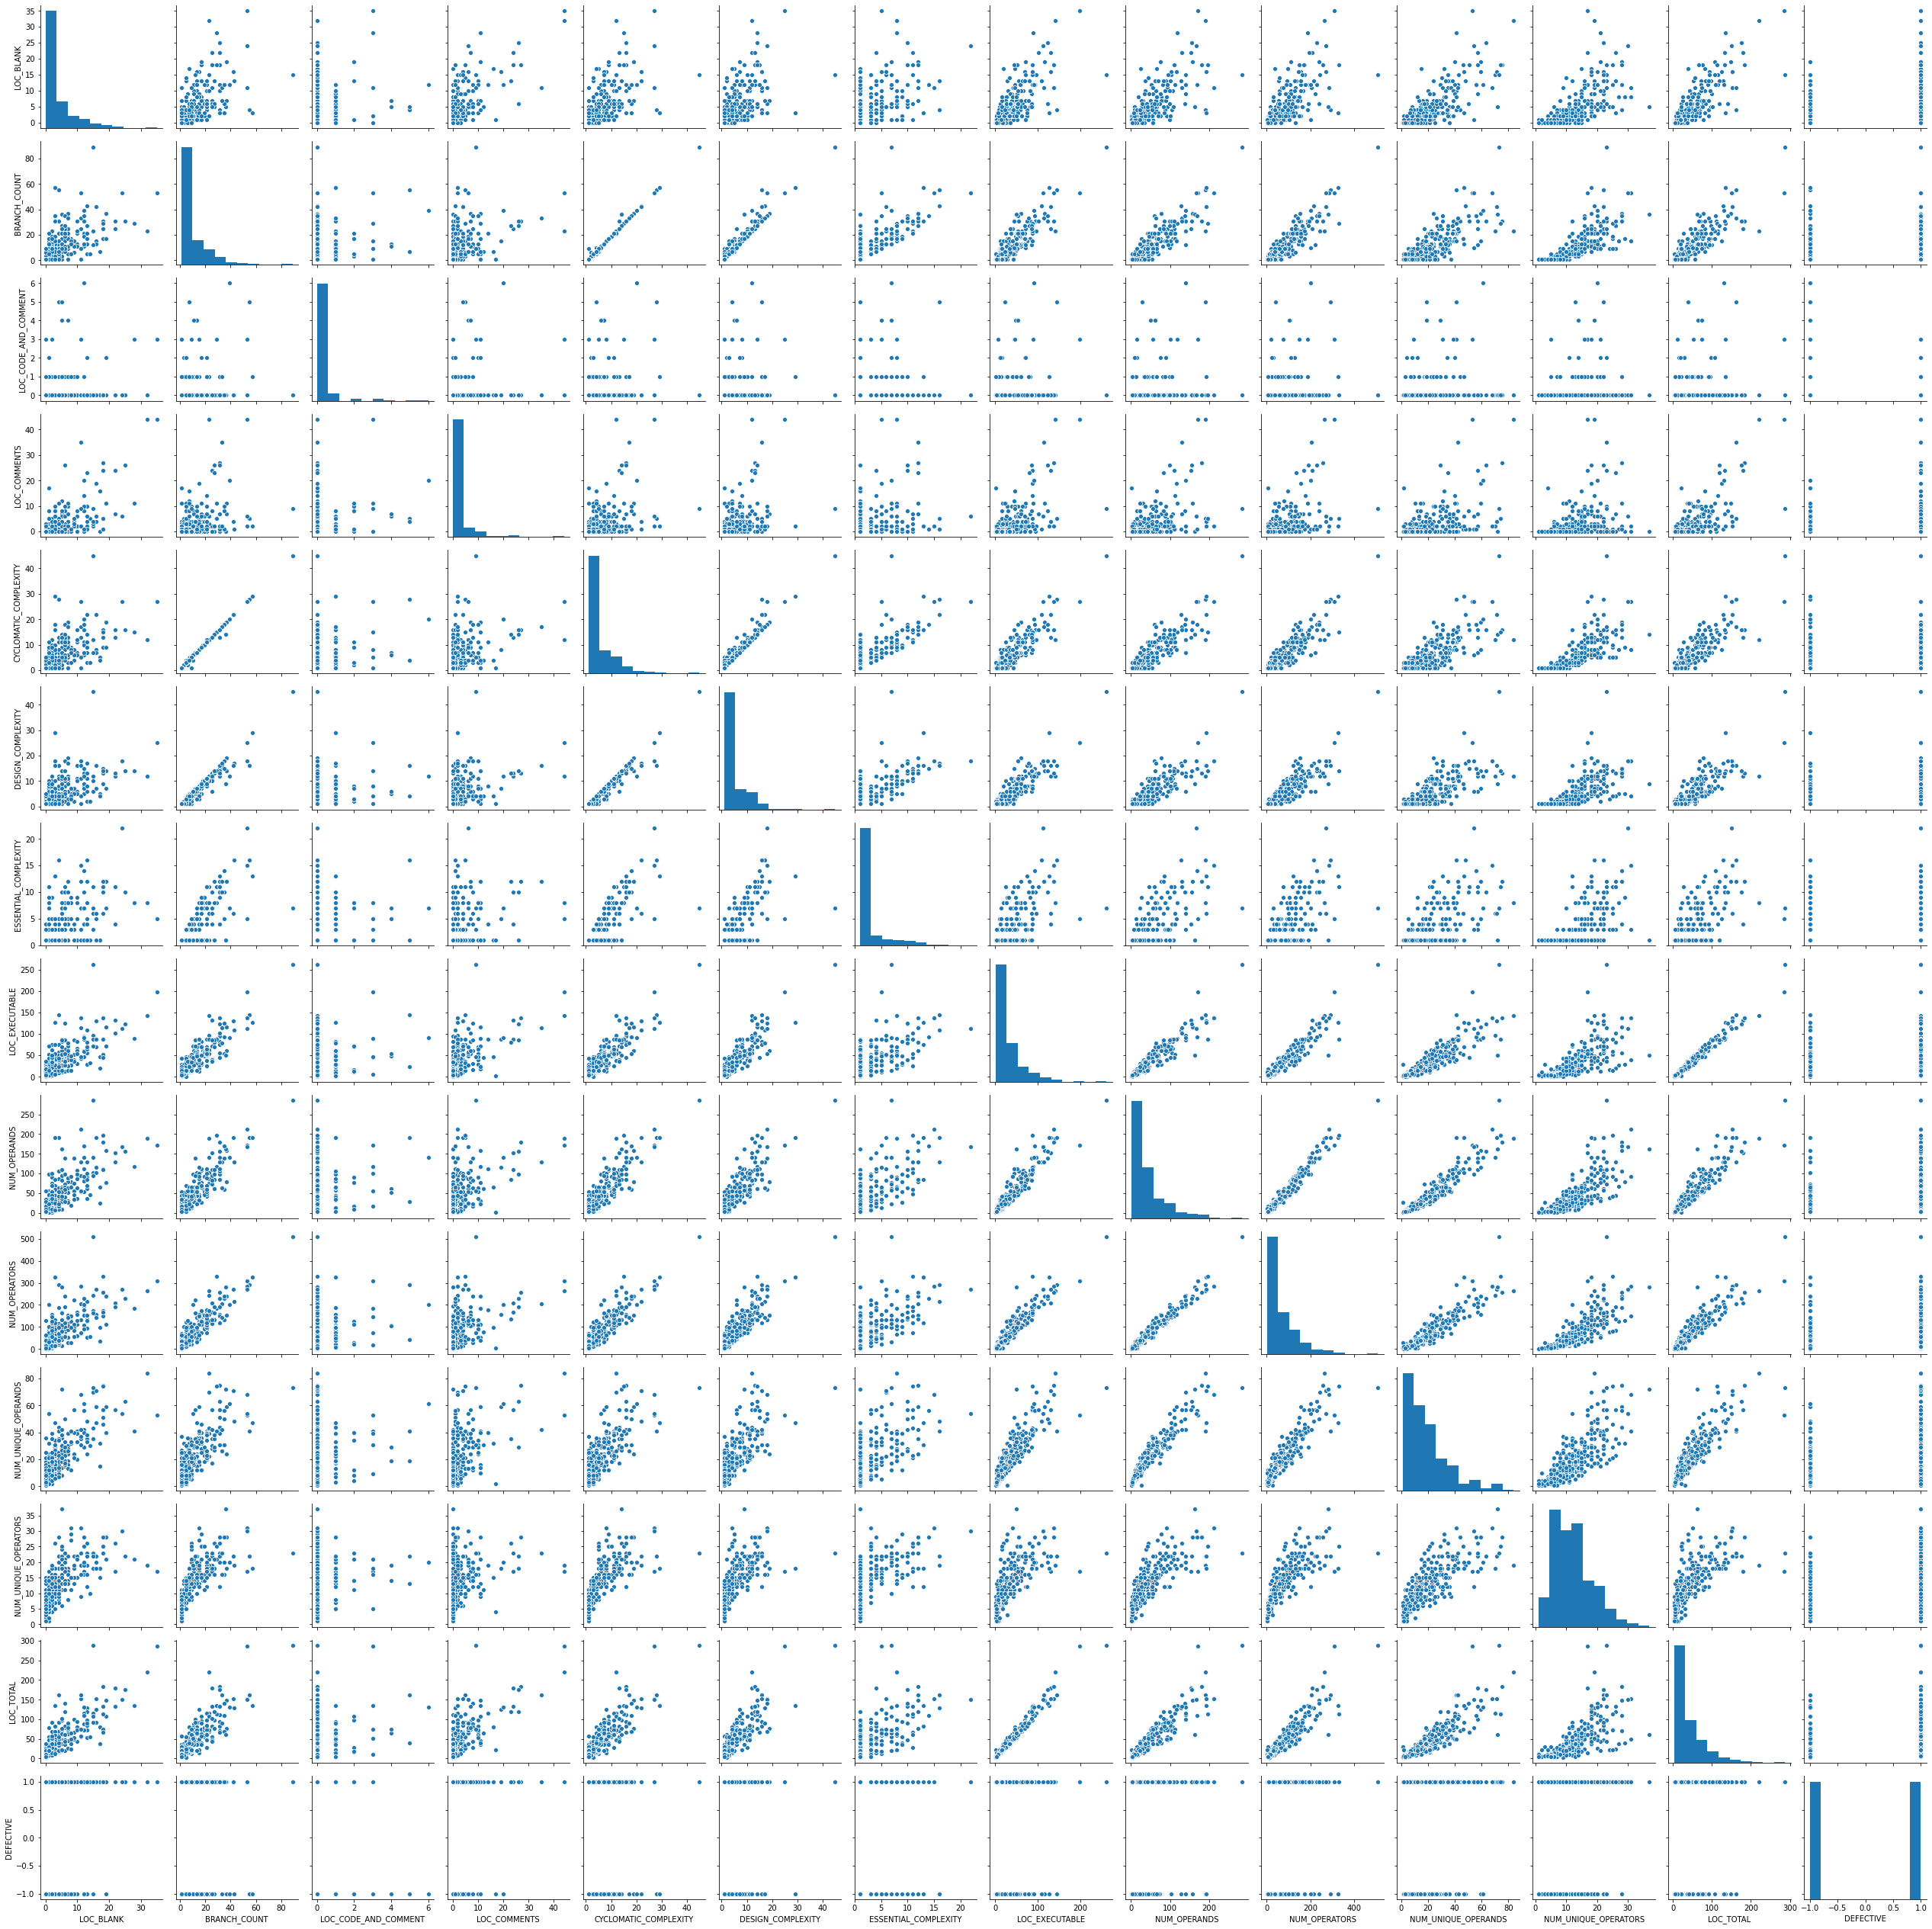

In [146]:
import seaborn as sns
sns.pairplot(train_data)

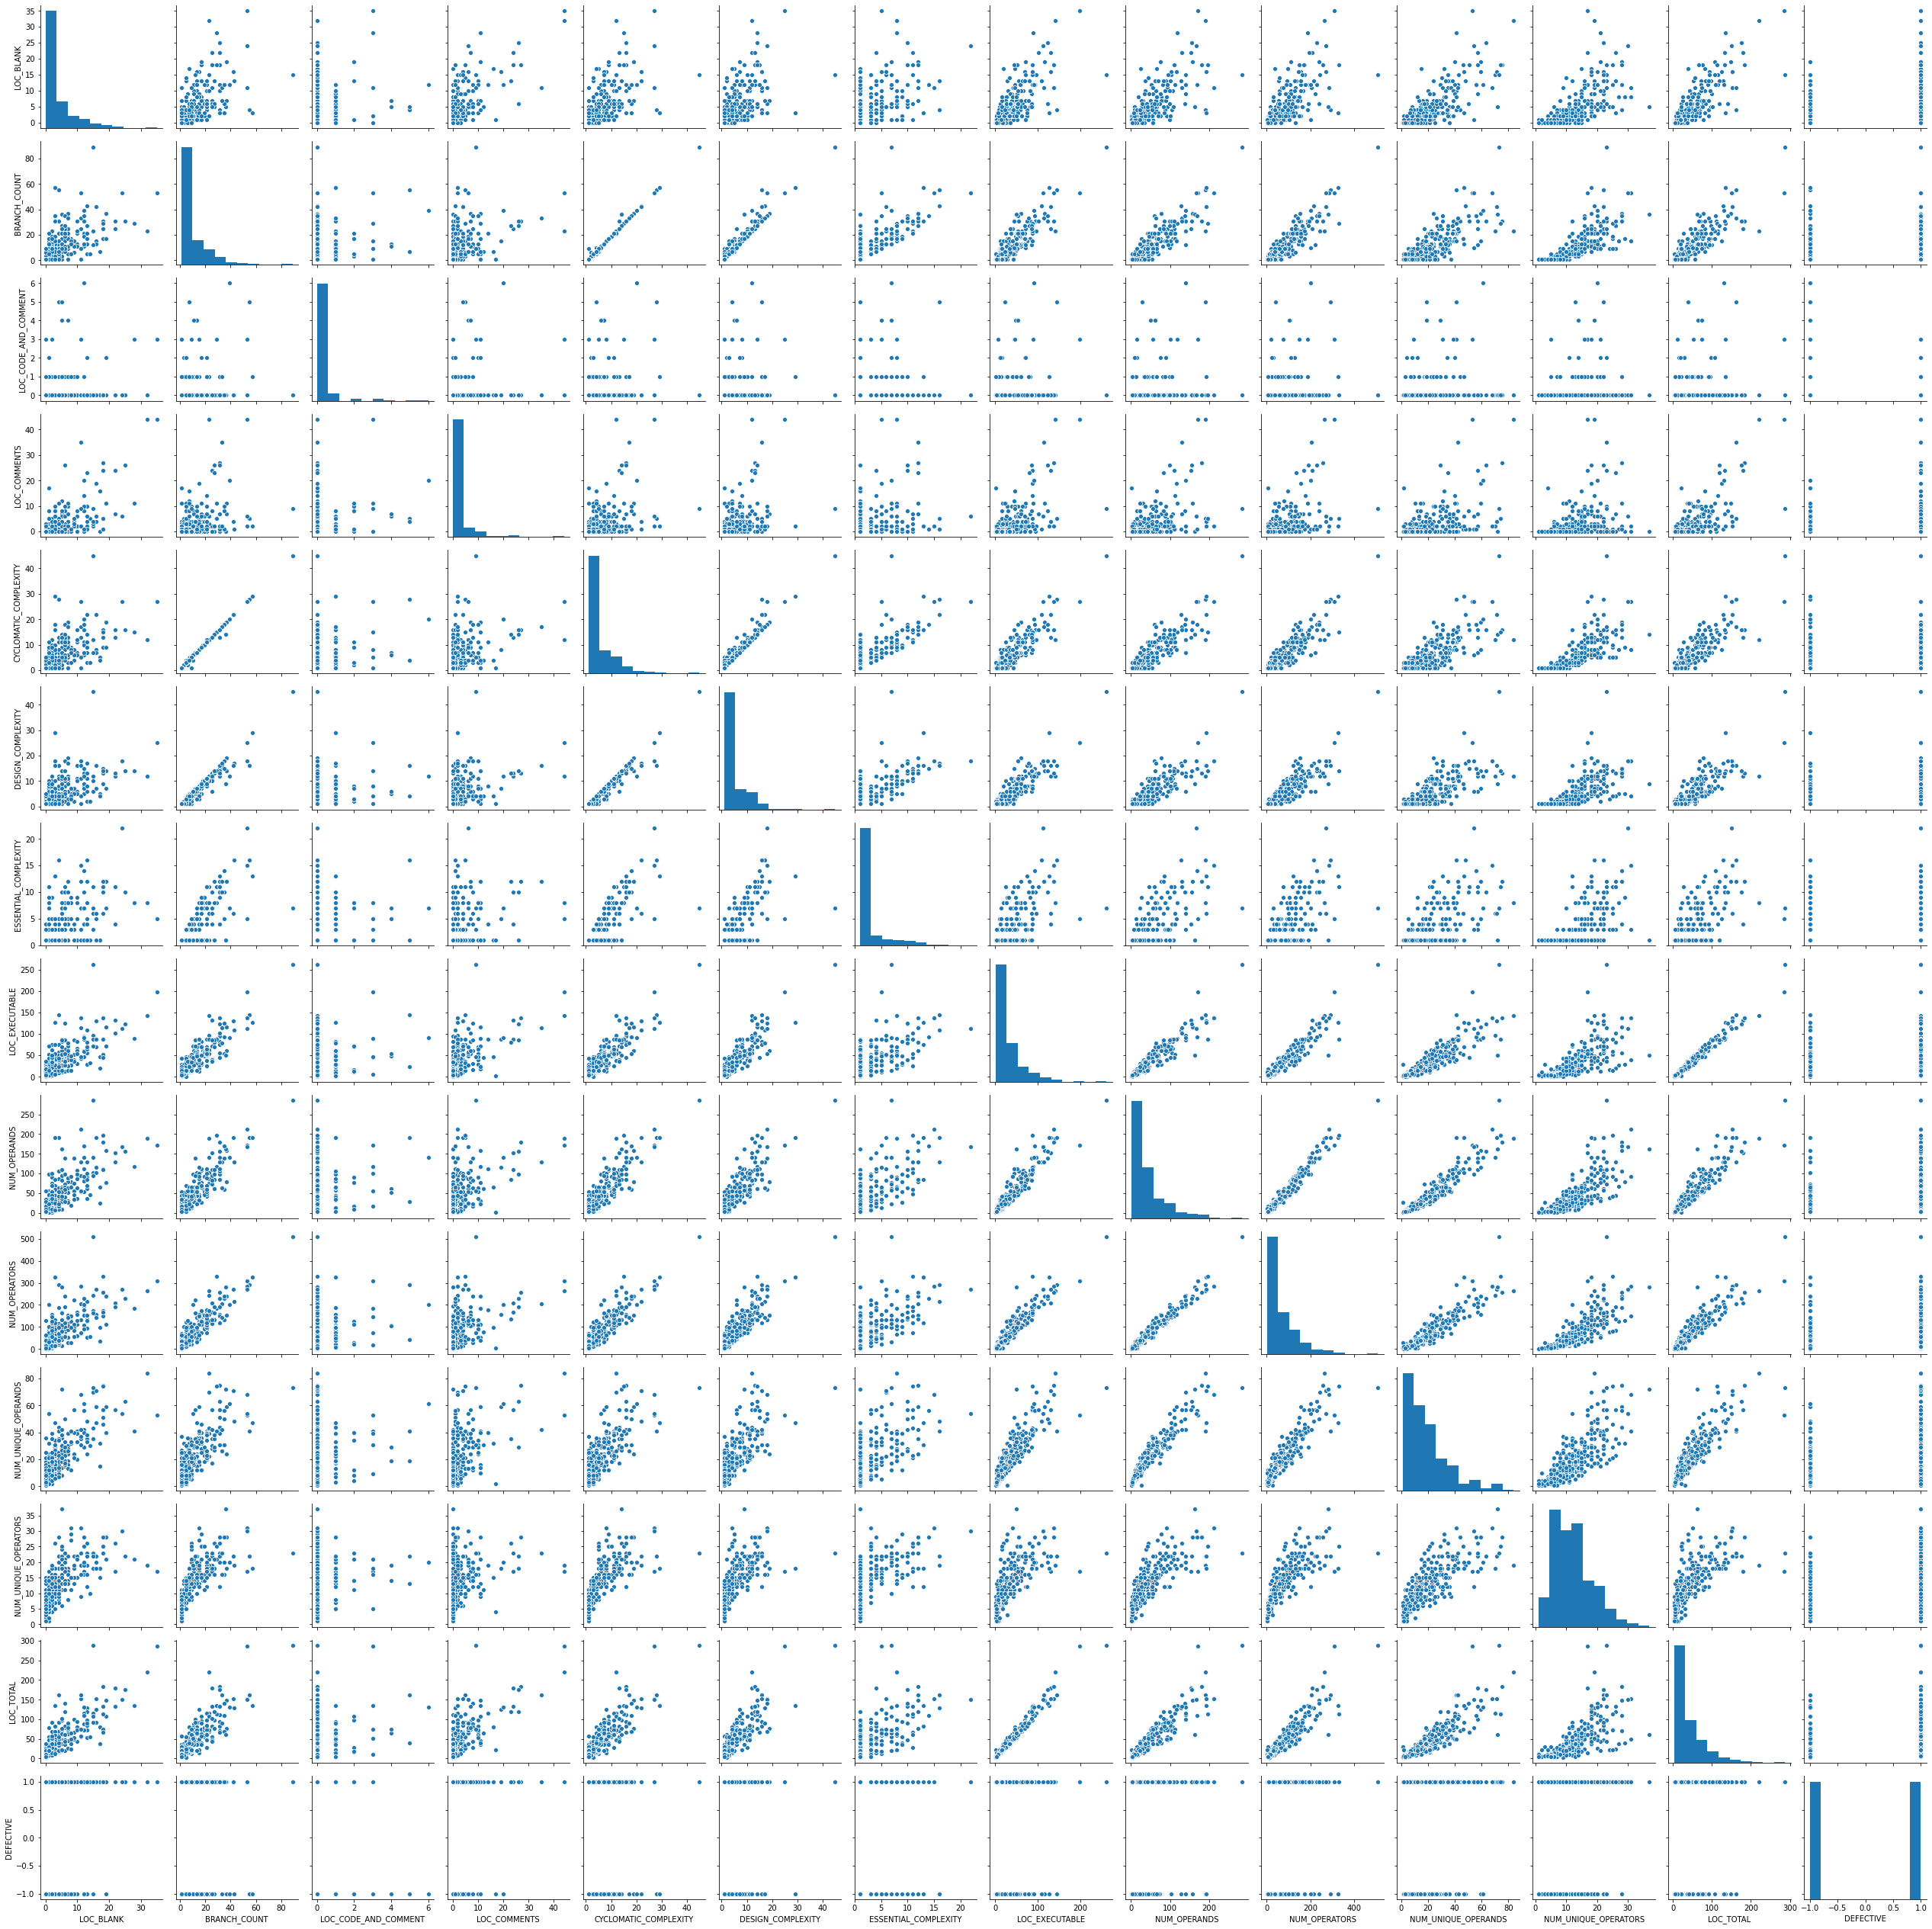

In [147]:
sns.pairplot(test_data)

Text(0.5, 1.0, 'Train Data')

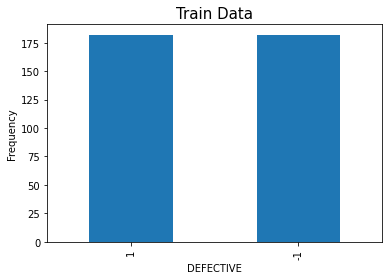

In [148]:
import matplotlib.pyplot as plt
train_data['DEFECTIVE'].value_counts().plot.bar()
plt.xlabel('DEFECTIVE')
plt.ylabel('Frequency')
plt.title('Train Data', fontsize = 15)

Text(0.5, 1.0, 'Test Data')

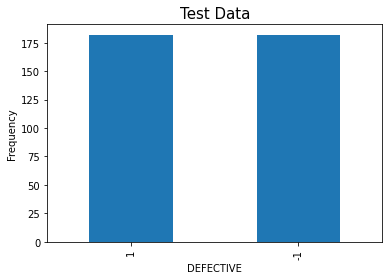

In [149]:
test_data['DEFECTIVE'].value_counts().plot.bar()
plt.xlabel('DEFECTIVE')
plt.ylabel('Frequency')
plt.title('Test Data', fontsize = 15)

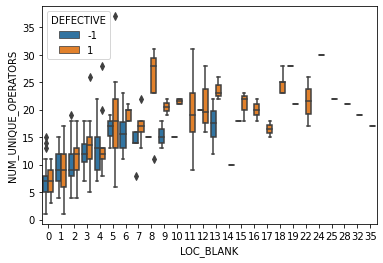

In [150]:
sns.boxplot(train_data['LOC_BLANK'],train_data['NUM_UNIQUE_OPERATORS'],hue=train_data['DEFECTIVE'])

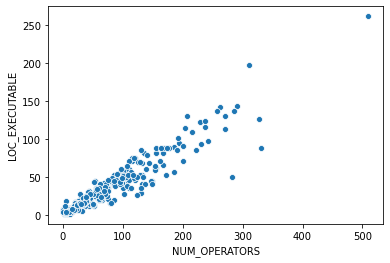

In [151]:
sns.scatterplot(x='NUM_OPERATORS',y='LOC_EXECUTABLE',data=train_data)

In [152]:
#Splitting the dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split

X=train_data.iloc[:,0:13].values 
y=train_data.iloc[:,13].values 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.55,random_state=0)

## Do a Principle Component Analysis

In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
#Feature scalling ; performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit_transform(train_data)
#Applying PCA function
from sklearn.decomposition import PCA

#PCA analysis on the original train dataset
pca= PCA(n_components =5)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([0.95937131, 0.02467987, 0.00676429, 0.00338772, 0.00224496])

In [155]:
#Scree plot using Cumulative variance
X_var = np.cumsum(np.round(ev,decimals=4)*100)
print(train_var)


[95.93 98.4  99.08 99.42 99.64]


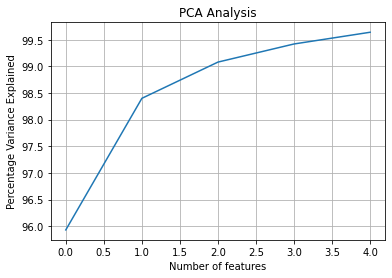

In [156]:
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Number of features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.grid()
plt.plot(train_var)

Based on the plot above, we could pick two features, which explains about 99% of the variance within the dataset

In [157]:
#Projecting test set on the same PCA space
test_data_reduced=pca.transform(test_data.iloc[:,0:13].values )
ev = pca.explained_variance_ratio_
ev

array([0.95937131, 0.02467987, 0.00676429, 0.00338772, 0.00224496])

### Using two principle components

In [158]:
pca= PCA(n_components =2)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([0.95937131, 0.02467987])

In [159]:
#Train data
principleComponents = pca.fit_transform(X)
principle_df=pd.DataFrame(data=principleComponents , columns = ['PC1','PC2'])
target_df=train_data[['DEFECTIVE']]
final_df=pd.concat([principle_df,target_df],axis=1)
final_df

,PC1,PC2,DEFECTIVE
0,-70.409895,-3.841690,1
1,-79.873162,2.686562,-1
2,-38.610132,11.404205,1
3,-92.145253,0.932912,-1
4,-72.536085,0.152834,-1
...,...,...,...
359,205.277586,6.188616,-1
360,197.739347,15.066243,1
361,-87.657781,0.256792,-1
362,-31.670998,15.121211,-1


In [160]:
#Test data
principleComponentsTest = pca.fit_transform(test_data_reduced)
principle_df_test=pd.DataFrame(data=principleComponentsTest , columns = ['PC1','PC2'])
target_df_test=train_data[['DEFECTIVE']]
final_df_test=pd.concat([principle_df_test,target_df_test],axis=1)


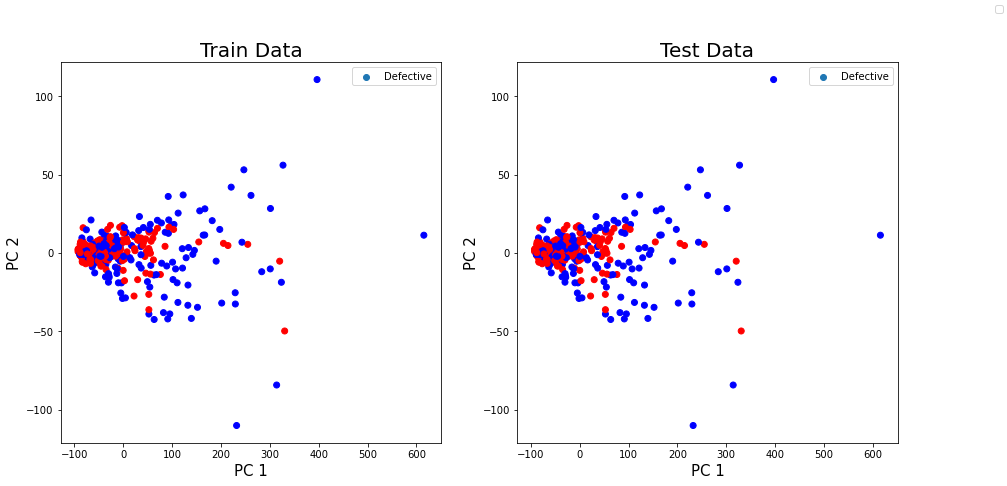

In [161]:
import matplotlib
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(1,2,1)
targets=['Defective','Non-defective']
colors=['red','blue']
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Train Data', fontsize=20)
ax.scatter(principle_df.PC1, principle_df.PC2,c=label,cmap=matplotlib.colors.ListedColormap(colors))
ax.legend(targets)

ax2=fig.add_subplot(1,2,2)
ax2.set_xlabel('PC 1', fontsize=15)
ax2.set_ylabel('PC 2', fontsize=15)
ax2.set_title('Test Data', fontsize=20)
ax2.scatter(principle_df_test.PC1, principle_df_test.PC2,c=label,cmap=matplotlib.colors.ListedColormap(colors))
ax2.legend(targets)

fig.legend([])

##  Task 3: Do a classification using the Naive Bayes Classification model

In [162]:
# Naive-Bayes Classification
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Gaussian Classifier
model=GaussianNB()

#Training the model using the training set
model.fit(X_train,y_train)

#Making predictions
y_pred = model.predict(X_test)

#Evaluating the model
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.88      0.71       103
           1       0.74      0.36      0.48        98

    accuracy                           0.63       201
   macro avg       0.67      0.62      0.60       201
weighted avg       0.67      0.63      0.60       201

[[91 12]
 [63 35]]


In [163]:
#Model performance on the test set
X_testset=test_data.iloc[:,0:13].values 
y_testset=test_data.iloc[:,13].values 

model.fit(X_testset,y_testset)
expected = y_testset
predicted = model.predict(X_testset)

#Evaluating the model
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.58      0.86      0.69       182
           1       0.72      0.37      0.49       182

    accuracy                           0.61       364
   macro avg       0.65      0.61      0.59       364
weighted avg       0.65      0.61      0.59       364

[[156  26]
 [115  67]]


##  Investigate how the number of features in the training dataset affects the model performance on the validation set

In [164]:
from sklearn.metrics import accuracy_score
i=1
train_accuracy=[]
test_accuracy=[]
numberOfFeatures=[]
while i<14:
    #Train data
    X=train_data.iloc[:,0:i].values 
    y=train_data.iloc[:,13].values 

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.55,random_state=0)
    model.fit(X_train,y_train)
    expected = y_test
    predicted = model.predict(X_test)
    train_accuracy.append(accuracy_score(expected,predicted))
    #Test data
    X_test=test_data.iloc[:,0:i].values 
    y_test=test_data.iloc[:,13].values 

    model.fit(X_test,y_test)
    expected = y_test
    predicted = model.predict(X_test)
    test_accuracy.append(accuracy_score(expected,predicted))
    numberOfFeatures.append(i)
    print(numberOfFeatures)
    i+=1
print(train_accuracy)
print(test_accuracy)
print(i)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.5920398009950248, 0.5970149253731343, 0.6169154228855721, 0.6169154228855721, 0.6119402985074627, 0.6069651741293532, 0.6119402985074627, 0.6119402985074627, 0.6218905472636815, 0.6169154228855721, 0.6268656716417911, 0.6218905472636815, 0.6268656716417911]
[0.5934065934065934, 0.6043956043956044, 0.5989010989010989, 0.6153846153846154, 0.6126373626373627, 0.5989010989010989, 0.6098901098901099, 0.6098901098901099, 0.6126373626373627, 0.6153846153846154, 0.6098901098901099, 0.6181318681318682, 0.6126373626373627]
14


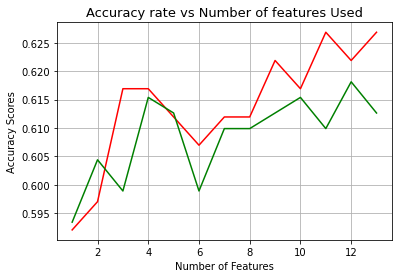

In [165]:
plt.plot(numberOfFeatures,train_accuracy,'r')
plt.plot(numberOfFeatures,test_accuracy,'g')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy rate vs Number of features Used',fontsize=13)
plt.grid()
plt.show()

I would choose to use 4 features. This is because the test_accuracy with four features reported the highest values for both the training set and the test set. This is as opposed to either 10 or 12 features. With these number of features, there was a reduction in the accuracy of the train set.

In [166]:
X=train_data.iloc[:,0:13].values 
y=train_data.iloc[:,13].values 
pca= PCA(n_components =4)
principleComponents = pca.fit_transform(X)
principle_df=pd.DataFrame(data=principleComponents , columns = ['PC1','PC2','PC3','PC4'])
target_df=train_data[['DEFECTIVE']]
final_df=pd.concat([principle_df,target_df],axis=1)
final_df

,PC1,PC2,PC3,PC4,DEFECTIVE
0,-70.409895,-3.841690,0.609379,0.439511,1
1,-79.873162,2.686562,-1.061856,2.257047,-1
2,-38.610132,11.404205,-0.035213,1.652338,1
3,-92.145253,0.932912,3.201705,1.687863,-1
4,-72.536085,0.152834,-0.748049,0.256725,-1
...,...,...,...,...,...
359,205.277586,6.188616,-15.636007,6.521289,-1
360,197.739347,15.066243,-11.676634,5.013917,1
361,-87.657781,0.256792,2.253625,1.499169,-1
362,-31.670998,15.121211,-1.275080,-3.269594,-1


In [167]:
X_final=final_df.iloc[:,0:4].values 
y_final=final_df.iloc[:,4].values 

X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.55,random_state=0)

model.fit(X_train,y_train)

expected = y_test
predicted = model.predict(X_test)
#Evaluating the model
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

          -1       0.64      0.87      0.74       103
           1       0.79      0.49      0.60        98

    accuracy                           0.69       201
   macro avg       0.71      0.68      0.67       201
weighted avg       0.71      0.69      0.67       201



## Summarize findings
Principal Component Analysis(PCA), has been applied as a dimentionality reduction technique to reduce the number of features used in prediction. It's ability to preserve the essential parts of the dataset while removing the non-essential parts leads to more accurate models.<BR> 
Analysis of the number of features used led to selection of 4 Primary components. Fitting the model resulted in an increase in the accuracy score from 0.61 to 0.69!
